In [2]:
dt = pd.read_csv('creditcard.csv', sep = ',')

In [3]:
dt.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Exploratory Data Analysis

Exploratory data analysis (EDA) is the first step in the data analysis process. Researchers and data analysts use EDA to understand and summarize the contents of a dataset, typically with a specific question in mind, or to prepare for more advanced statistical modeling in future stages of data analysis.

In [9]:
dt.isnull().values.any()

False

Text(0.5, 1.0, 'Transaction Class Distribution')

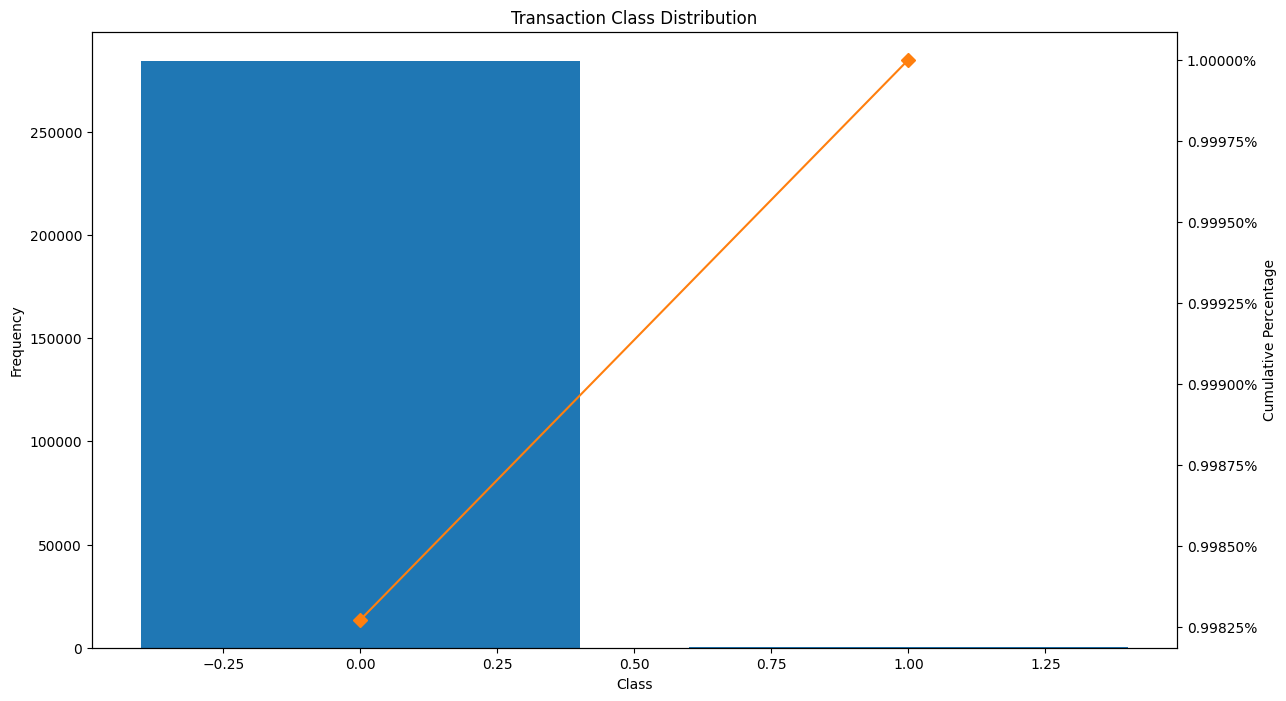

In [11]:
count_classes = pd.value_counts(dt['Class'], sort = True)
df = pd.DataFrame({'count': count_classes})
df['cumpercentage'] = df['count'].cumsum() / df['count'].sum()

fig, ax = plt.subplots()
ax.bar(df.index, df['count'], color = 'C0')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')

ax2 = ax.twinx()
ax2.plot(df.index, df['cumpercentage'], color = 'C1', marker = 'D', ms = 7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel('Cumulative Percentage')

plt.title('Transaction Class Distribution')

In [12]:
# Fraud and the normal are the dataset

fraud = dt[dt['Class']==1]

normal = dt[dt['Class']==0]

In [13]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [14]:
# Different amount of money used in different transaction classes
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

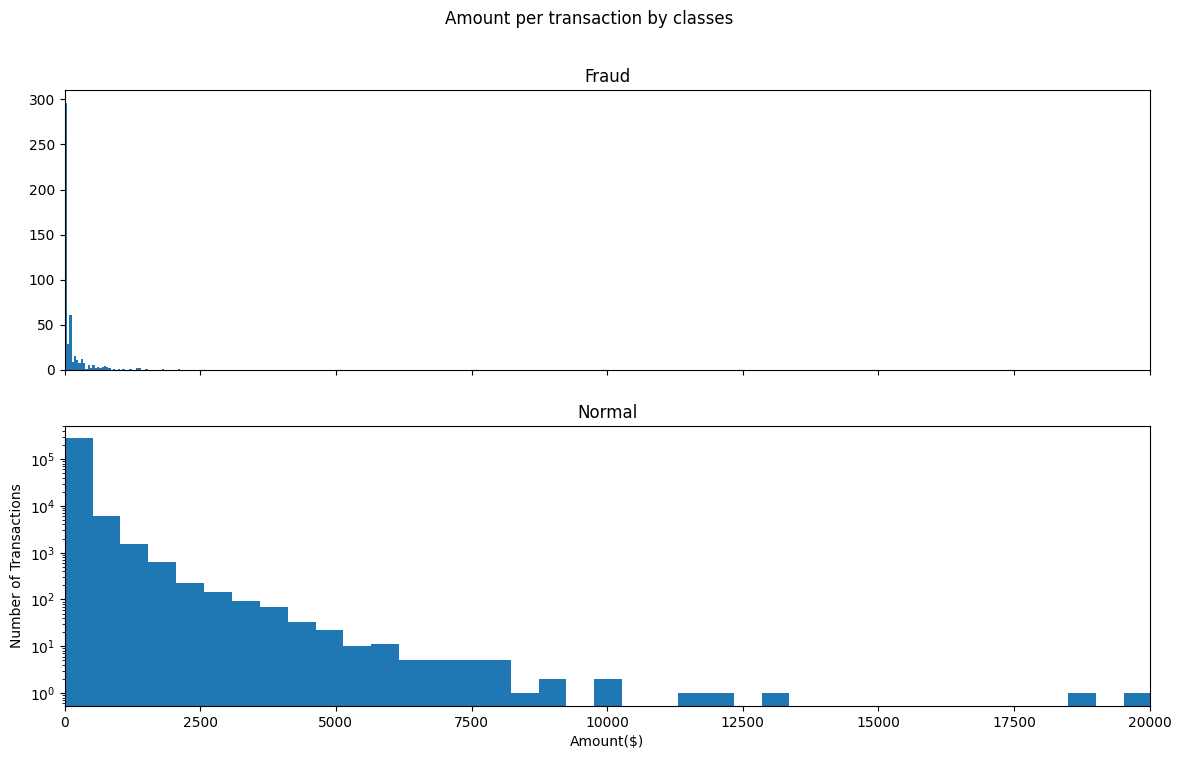

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('Amount per transaction by classes')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount($)')
plt.ylabel('Number of Transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show();

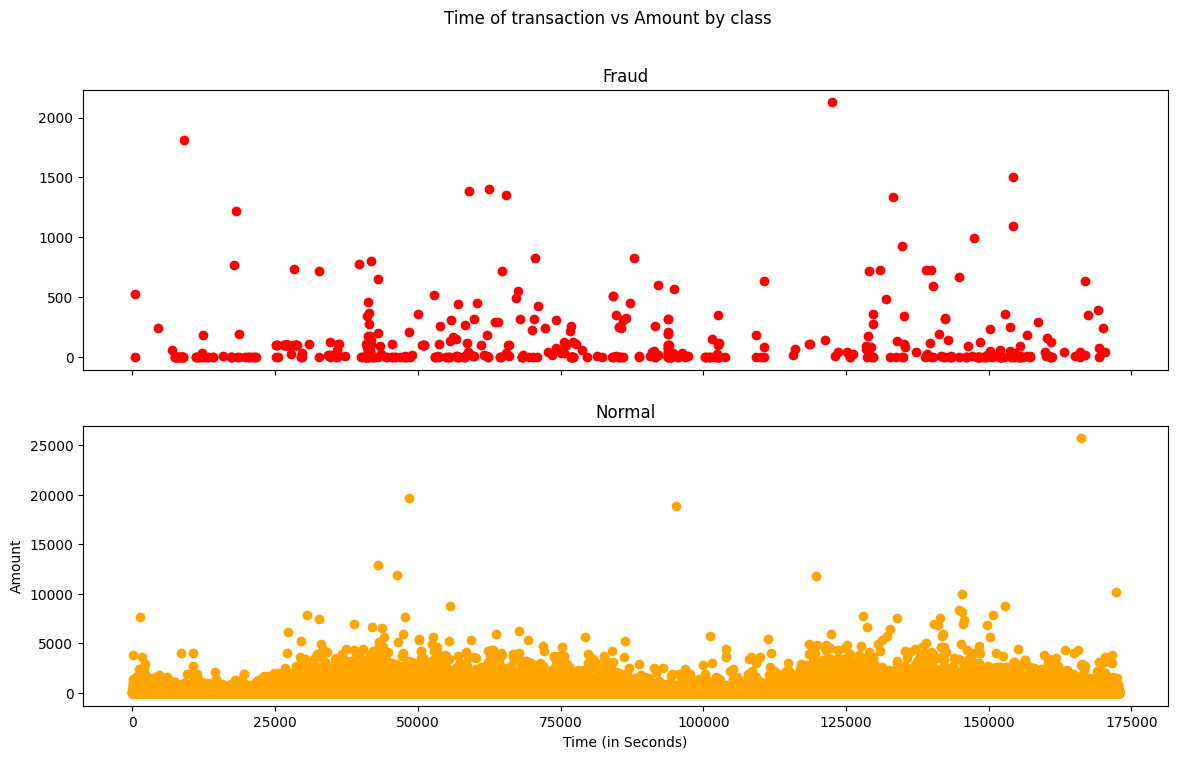

In [16]:
# We Will check fraudulent transactions occur more often during certain time frame and find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount, color = 'red')
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount, color='orange')
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [17]:
# Take 1 percent sample of the data

dt1 = dt.sample(frac = 0.1,random_state = 1)
dt1.shape

(28481, 31)

In [18]:
dt.shape

(284807, 31)

In [19]:
# The number of fraud and valid transaction in the dataset

fraud = dt1[dt1['Class']==1]
Valid = dt1[dt1['Class']==0]

outlier_fraction = len(fraud)/float(len(Valid))

In [21]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


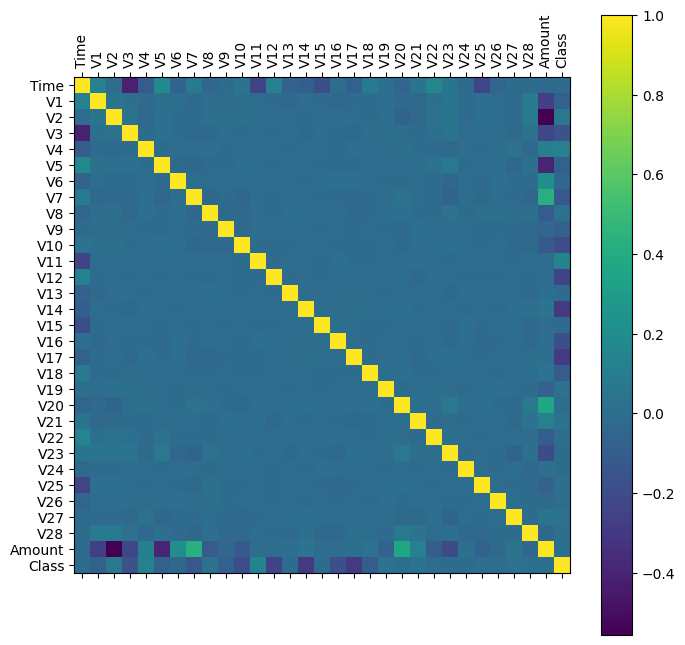

In [23]:
# Calculate the correlation matrix
corrmat = dt1.corr()

# Create the matrix plot
plt.matshow(corrmat)
plt.xticks(range(len(corrmat.columns)), corrmat.columns, rotation = 90)
plt.yticks(range(len(corrmat.columns)), corrmat.columns)
plt.colorbar()
plt.show()


In [24]:
#Create independent and Dependent Features
columns = dt1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = dt1[columns]
Y = dt1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


# We are going to use 2 Algorithm

## 1} Isolation Forest Algorithm :

Unsupervised machine learning algorithm for anomaly detection

● Detects anomalies using binary trees.

● Linear time complexity and low memory requirement

● Anomalous data points are easier to separate from the rest of the sample

● Generates partitions on the sample by randomly selecting an attribute and a split value

● Recursive partitioning represented by a tree structure named Isolation Tree

● Popular for anomaly detection in fields such as cybersecurity, finance, and medical research

## 2} Local Outlier Factor(LOF) Algorithm

● Unsupervised anomaly detection method

● Computes the local density deviation of a given data point with respect to its neighbors

● Considers as outliers the samples that have a substantially lower density than their neighbors

● Shares some concepts with DBSCAN and OPTICS such as the concepts of "core distance" and "reachability distance"

● Locality is given by k nearest neighbors, whose distance is used to estimate the density

In [26]:
# Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

In [27]:
type(classifiers)

dict

In [ ]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



# OBSERVATION

● Isolation Forest detected 73 errors, Local Outlier Factor detected 97 errors, and SVM detected 8516 errors.

● Isolation Forest was 99.74% accurate, LOF was 99.65% accurate, and SVM was 70.09% accurate.

● Isolation Forest had a fraud detection rate of around 27%, LOF had a detection rate of 2%, and SVM had a detection rate of 0%.

● Overall, Isolation Forest performed the best in detecting fraud cases at around 30%.

● Accuracy can be improved by increasing sample size, using deep learning algorithms, or using more complex anomaly detection models.